# Click Stream Analytics Project_Part I

This assignment will analyze the data (HotelClickStream.xls) and interpret the results. This dataset includes clickstream data of online transactions for hotel booking in year 2011. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

Load the HotelClickStream dataset into a pandas dataframe names as df

In [2]:
df = pd.read_excel("HotelClickStream.xls",delimiter=",")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
ID                   3749 non-null int64
DOMAIN_ID            3749 non-null uint64
MACHINE_ID           3749 non-null int64
SITE_SESSION_ID      3749 non-null int64
TRANS_FREQ           3749 non-null int64
DOMAIN_NAME          3749 non-null object
DIRECTP_D            3749 non-null int64
PROD_NAME            3749 non-null object
PROD_QTY             3749 non-null int64
PROD_TOTPRICE        3749 non-null float64
REF_DOMAIN_NAME      1687 non-null object
DURATION             3749 non-null float64
PAGES_VIEWED         3749 non-null int64
HOUSEHOLD_SIZE       3749 non-null int64
CHILDREN_D           3749 non-null int64
CONNECTIONSPEED_D    3749 non-null int64
dtypes: float64(2), int64(10), object(3), uint64(1)
memory usage: 468.7+ KB


In [4]:
df.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D'],
      dtype='object')

In [5]:
df.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1


# Question 1
Please first create the following 2 additional variables into your data

   1) REF_D (create a dummy variable indicating whether the transaction was referenced from other website, if not, the final booking website was directly accessed. If no information provided for the variable REF_DOMAIN_NAME, REF_D = 0; otherwise REF_D = 1)


In [6]:
df.loc[pd.isna(df.REF_DOMAIN_NAME),'REF_D']=0
df.loc[pd.notna(df.REF_DOMAIN_NAME),'REF_D']=1

In [7]:
df.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0


<br>
<br>
2) LOG_PRICE (take the log transformation of the variable PROD_TOTPRICE )

In [8]:
df.PROD_TOTPRICE.min()

0.0

In [9]:
df['LOG_PRICE']=np.log1p(df.PROD_TOTPRICE)

In [10]:
df.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE'],
      dtype='object')

In [11]:
df.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430


# Question a) 
Please provide a summary table showing the top 10 domain names (DOMAIN_NAME) that generated the most volume of transactions the report should look like the following Table. Please summarize briefly your observations from the results

In [12]:
df.groupby(['DOMAIN_NAME'])['TRANS_FREQ'].count().nlargest(10)


DOMAIN_NAME
marriott.com        524
hilton.com          438
hotels.com          400
expedia.com         380
priceline.com       309
choicehotels.com    297
jetblue.com         229
hotwire.com         217
bestwestern.com     120
orbitz.com          109
Name: TRANS_FREQ, dtype: int64

------------------------Result Summary------------------ 
<br>
The  observation table shows that 'marriott.com' generated the most volume with 524 transactions, while orbitz.com ranks at 10 with 109 transactions.
<br>
<br>


# Question b) 
Please provide a summary table showing the top 10 reference domain names (REF_DOMAIN_NAME) that generated the most volume of transactions. The report should look like the following Table. Please summarize briefly your observations from the results.

In [13]:
df.groupby(['REF_DOMAIN_NAME'])['TRANS_FREQ'].count().nlargest(10)

REF_DOMAIN_NAME
google.com           620
yahoo.com            222
bing.com             129
aol.com               53
comfortinn.com        48
jetblue.com           43
qualityinn.com        29
comfortsuites.com     22
kayak.com             20
mywebsearch.com       17
Name: TRANS_FREQ, dtype: int64

------------------------Result Summary------------------ 
<br>
The observation table shows that 'google.com' generated the most volume with 620 transactions, while 'mywebsearch.com' ranks at 10 with 17 transactions. 
<br>
<br>

# Question c) 
Please provide summary statistics (N, Max, Min, Mean, and Std.) for variables: DIRECTP_D; REF_D; DURATION; PAGES_VIEWED; LOG_PRICE; and TRANS_FREQ. Please report your summary statistics table and provide short descriptions (a few bullet points) of your observation

In [14]:
df[['DIRECTP_D','REF_D','DURATION', 'PAGES_VIEWED', 'LOG_PRICE','TRANS_FREQ']].agg(['count','max','min','mean','std'])

,DIRECTP_D,REF_D,DURATION,PAGES_VIEWED,LOG_PRICE,TRANS_FREQ
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
max,1.000000,1.000000,227.343750,141.000000,7.954386,30.000000
min,0.000000,0.000000,0.029999,1.000000,0.000000,1.000000
mean,0.481462,0.449987,25.317508,18.331288,4.439926,2.981328
std,0.499723,0.497559,22.806497,16.636523,1.615478,4.120927


------------------------Result Summary------------------
<br>
•	The count indicates the number of observations in the HotelClickStream dataset. Here, total of 3749 observation are             available. 
<br>
•	The maximum time spent at a site i.e. DURATION is 227.343 mins and the minimum time spent at a site is 0.02 mins.
<br>
•	The maximum number of pages viewed at a site i.e. PAGE_VIEWED is 141 and the minimum number of pages viewed at a site is 1.
<br>
•	The maximum number of transactions for the household i.e. TRANS_FREQ is 30 and the minimum number of transactions for the       household is 1. 
<br>
•	The average of all variables is shown as the mean in the below table.
<br>
•	The standard deviation shows how the numbers are spread out from the mean (average) value. Here, DIRECTTP_D' and REF_D'         have low standard deviation, Hence the data is closer to the mean value. 
<br>
<br>


# Question d) 
Please make a Scatter Plot and a Histogram for any of the variables of your own interests in the data. Then report any insights you may be able draw from the charts.

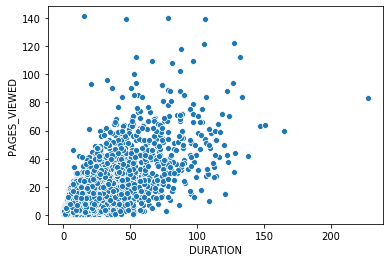

In [15]:
sns.scatterplot(x=df["DURATION"],y=df["PAGES_VIEWED"])

------------------------Result Summary------------------
<br>
The above scattered plot is drawn between two variables PAGES_VIEWED and DURATION.  It can be inferred from the graph that these two variables are Positively correlated to each other, as the number of pages viewed increases the duration spent on the website will also increase and vise-versa. Here ,we say that it is a positive correlation between the variables.
<br>
<br>

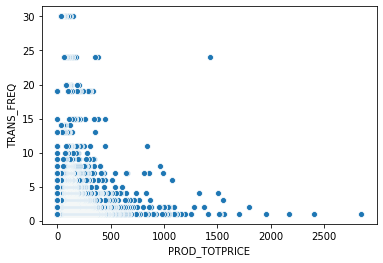

In [16]:
sns.scatterplot(x= df["PROD_TOTPRICE"],y= df["TRANS_FREQ"])

------------------------Result Summary------------------
<br>
The above scattered plot is drawn between two variables PROD_TOTPRICE and TRANS_FREQ. It can be inferred from the graph that these two variables are Negatively correlated to each other, as the PROD_TOPRICE the total price paid for the transaction increases the TRNAS_FREQ the total number of transactions for the household decreases. Here, we say that it is a negative correlation between the variables.
<br>
<br>

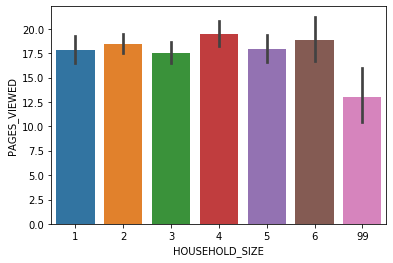

In [17]:
sns.barplot(df["HOUSEHOLD_SIZE"],y= df["PAGES_VIEWED"])

------------------------Result Summary------------------
<br>
The above plot is drawn between two variables HOUSEHOLD_SIZE and PAGES_VIEWED. It can be inferred from the graph that these two variables are not correlated to each other, as the HOUSEHOLD_SIZE has no visual effect on the number of Pages viewed. When there is no clear relationship between the variables, we can conclude that there is no correlation between the two variables.
<br>
<br>

# Question 2  (a) 

Please use the linear regression technique to answer the question on “what are the factors that influence how much time people spend on a website?”( Hint: use DURATION as your DV). You should try different set of independent variables in the data set to see which one(s) has significant results (create dummy variables for some of the non-numerical variables if needed). (Hint: you may start with doing pair-wise correlations between Y and other variables to see what variables are significantly correlated with Y.) Please report 1) the final set of independent variables you have chosen and why you have chosen them; and 2) the estimated regression equation with simple explanations for each estimated coefficient (β). Please ONLY report and interpret your final regression results.

### Lets consider DURATION as our dependent variables(DV) and rest other varaibles as independent variables(IV) here. Lets compute the correlation coefficient between DV and other IV's.

Firstly creating a Dummy varibale for DOMAIN_NAME 

In [18]:
df['DOMAIN_NAME'] = df['DOMAIN_NAME'].astype('category')
df['DOMAIN_NAME_CAT']=df['DOMAIN_NAME'].cat.codes
df.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE',
       'DOMAIN_NAME_CAT'],
      dtype='object')

In [19]:
df.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE,DOMAIN_NAME_CAT
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0,7.954386,13
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527,17
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0,7.682022,12
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0,7.580547,7
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430,24


### Using correlation matrix and pearsonr methods to check the correlation between the variables.

In [20]:
df.corr(method="pearson")

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE,DOMAIN_NAME_CAT
ID,1.000000,0.038586,0.952295,0.004208,-0.114883,-0.034965,0.005063,-0.007324,0.029594,0.022560,0.002909,-0.095701,0.000156,-0.018633,-0.025835,0.005158
DOMAIN_ID,0.038586,1.000000,0.038751,-0.007248,-0.089012,-0.351144,0.118018,0.033271,0.036471,0.064118,0.007169,0.010310,-0.026072,-0.086020,0.039558,0.009164
MACHINE_ID,0.952295,0.038751,1.000000,0.012307,-0.117147,-0.036581,0.014423,-0.002471,0.035211,0.027896,-0.004405,-0.097963,-0.003886,-0.011730,-0.018847,0.004483
SITE_SESSION_ID,0.004208,-0.007248,0.012307,1.000000,-0.017602,-0.030781,-0.015716,-0.010711,-0.030520,-0.043054,0.002602,-0.036044,0.032614,0.050735,0.023168,-0.007578
TRANS_FREQ,-0.114883,-0.089012,-0.117147,-0.017602,1.000000,0.163209,-0.065697,-0.052992,-0.010917,0.025028,-0.037308,-0.085999,0.036545,-0.079702,-0.000675,-0.013492
DIRECTP_D,-0.034965,-0.351144,-0.036581,-0.030781,0.163209,1.000000,-0.122628,-0.072143,-0.182002,-0.065661,-0.016967,0.022890,0.011958,0.151060,0.017000,-0.231298
PROD_QTY,0.005063,0.118018,0.014423,-0.015716,-0.065697,-0.122628,1.000000,0.489334,0.127122,0.126278,0.001331,-0.002309,0.003952,-0.048706,0.117125,-0.014860
PROD_TOTPRICE,-0.007324,0.033271,-0.002471,-0.010711,-0.052992,-0.072143,0.489334,1.000000,0.032113,-0.024857,0.001598,-0.016192,-0.003924,-0.004791,0.599914,-0.007032
DURATION,0.029594,0.036471,0.035211,-0.030520,-0.010917,-0.182002,0.127122,0.032113,1.000000,0.685071,-0.014173,0.044570,-0.021533,0.003514,-0.072967,0.058986
PAGES_VIEWED,0.022560,0.064118,0.027896,-0.043054,0.025028,-0.065661,0.126278,-0.024857,0.685071,1.000000,-0.008607,0.033867,-0.007393,-0.007442,-0.128531,0.097144


### pearsonr method
<br>
Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [21]:
stats.pearsonr(x=df["TRANS_FREQ"], y=df["DURATION"])

(-0.010916691309780535, 0.5039957529503801)

TRANS_FREQ is Not significant correlated with duration.

In [22]:
stats.pearsonr(x=df["DOMAIN_NAME_CAT"], y=df["DURATION"])

(0.05898643996133956, 0.0003019427518825999)

DOMAIN_NAME_CAT is significantly correlated with duration.

In [23]:
stats.pearsonr(x=df["DIRECTP_D"], y=df["DURATION"])

(-0.18200167861751276, 2.7753543208190736e-29)

DIRECTP_D is significantly correlated with duration and P-value is negative exponent value which is less than 0.05

In [24]:
stats.pearsonr(x=df["PROD_QTY"], y=df["DURATION"])

(0.1271217337710795, 5.599137613824228e-15)

PROD_QTY is significantly correlated with duration and P-value is negative exponent value which is less than 0.05

In [25]:
stats.pearsonr(x=df["PROD_TOTPRICE"], y=df["DURATION"])

(0.032113478651351654, 0.049283589013318065)

PROD_TOTPRICE is significantly correlated with duration as P-value is less than 0.05

In [26]:
stats.pearsonr(x=df["PAGES_VIEWED"], y=df["DURATION"])

(0.6850714969486446, 0.0)

 PAGES_VIEWED  is significantly correlated with duration as P-value is less than 0.05 and the correlation coefficient value is 68% which shows strong positive correlation with duration.

In [27]:
stats.pearsonr(x=df["REF_D"], y=df["DURATION"])

(0.0035135107345671103, 0.8297221402160371)

REF_D is not significantly correlated with duration 

In [28]:
stats.pearsonr(x=df["HOUSEHOLD_SIZE"], y=df["DURATION"])


(-0.014173327095217595, 0.38562762328698474)

In [29]:
stats.pearsonr(x=df["CONNECTIONSPEED_D"], y=df["DURATION"])

(-0.02153259465369433, 0.1874587698948439)

HOUSEHOLD_SIZE,CONNECTIONSPEED_D both variables are Not significant correlated with duration.

In [30]:
stats.pearsonr(x=df["CHILDREN_D"], y=df["DURATION"])

(0.04457028022909549, 0.006344132849191042)

CHILDREN_D is significantly correlated with duration as P-value is less than 0.05

### Start to do regression model

Variables like ID, DOMAIN_ID, MACHINE_ID, SITE_SESSION_ID in our dataset are not significant for our regression model, beacuse they just Identification number's. So we are not using these varible in our model. 
<br>
<br>

In [31]:
import statsmodels.api as sm

In [32]:
mod=sm.OLS(df.DURATION,df[['DOMAIN_NAME_CAT','PAGES_VIEWED','PROD_QTY']])
res=mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               DURATION   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              3874.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        22:51:33   Log-Likelihood:                         -15902.
No. Observations:                3749   AIC:                                  3.181e+04
Df Residuals:                    3746   BIC:                                  3.183e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [33]:
indepvar=sm.add_constant(df[['DOMAIN_NAME_CAT','PAGES_VIEWED','PROD_QTY']])

C:\Users\monik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
mod=sm.OLS(df.DURATION,indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1112.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:51:33   Log-Likelihood:                -15849.
No. Observations:                3749   AIC:                         3.171e+04
Df Residuals:                    3745   BIC:                         3.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.3384      0.707     

<br>
<br>
We first run the linear regression model using the entire dataset. Then we intrepreted the p-values for each varibles in the model and picked thoes significant varibles for our final model. We can see that PAGES_VIEWED and PROD_QTY are statistically significant.

### FINAL Model: 

Fit data into the model and printing the result summary 

In [35]:
mod=sm.OLS(df.DURATION,df[['PAGES_VIEWED','PROD_QTY']])
res=mod.fit()
print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:               DURATION   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              5637.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        22:51:33   Log-Likelihood:                         -15945.
No. Observations:                3749   AIC:                                  3.189e+04
Df Residuals:                    3747   BIC:                                  3.191e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

We need intercept, unless you have a strong evidence for non-intercept

In [36]:
indepvar=sm.add_constant(df[['PAGES_VIEWED','PROD_QTY']])

In [37]:
mod=sm.OLS(df.DURATION,indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1668.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:51:33   Log-Likelihood:                -15849.
No. Observations:                3749   AIC:                         3.170e+04
Df Residuals:                    3746   BIC:                         3.172e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0677      0.503     14.060   

### Interpreting the Regression Results

I highlighted several important components within the results:

1. Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. In this model, the Adj. R-squared value is 47%. 
<br>
<br>
2. const coefficient is Y-intercept. It means that if both the PAGES_VIEWED and PROD_QTY coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient i.e.7.06 min.
<br>
<br>
3. PAGES_VIEWED coefficient represents the change in the output Y due to a change of one unit in the PAGES_VIEWED (everything else held constant)
<br>
<br>
4. PROD_QTY coefficient represents the change in the output Y due to a change of one unit in the PROD_QTY(everything else held constant)
<br>
<br>
5. std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
<br>
<br>
6. P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
<br>
<br>
7. Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

# Question 2  (b)  
Please use the linear regression technique to answer the question on “what are the factors that influence how many pages people views when visiting a website?”(Hint:use PAGES_VIEWED as your DV). And decide your IVs by conducting the similar exercises in the above analysis. Please ONLY report and interpret your final regression results.

### Lets consider PAGES_VIEWED  as our dependent variables(DV) and rest other varaibles as independent variables(IV) here. Lets compute the correlation coefficient between DV and other IV's.

Computing the correlation coefficient between PAGES_VIEWED and rest of the varibles.
<br>
<br>
### pearsonr method

Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.
<br>

In [38]:
stats.pearsonr(x=df["TRANS_FREQ"], y=df["PAGES_VIEWED"])

(0.02502846746458245, 0.12547334735061133)

In [39]:
stats.pearsonr(x=df["DOMAIN_NAME_CAT"], y=df["PAGES_VIEWED"])

(0.09714356619793295, 2.5204051228027408e-09)

DOMAIN_NAME_CAT is significantly correlated with page_viewed and P-value is negative exponent value which is less than 0.05

In [40]:
stats.pearsonr(x=df["DIRECTP_D"], y=df["PAGES_VIEWED"])

(-0.06566123654458968, 5.736919897386752e-05)

DIRECTP_D is significantly correlated with page_viewed and P-value is negative exponent value which is less than 0.05

In [41]:
stats.pearsonr(x=df["PROD_QTY"], y=df["PAGES_VIEWED"])

(0.12627838705261366, 8.465259595338043e-15)

PROD_QTY is significantly correlated with page_viewed and P-value is negative exponent value which is less than 0.05

In [42]:
stats.pearsonr(x=df["LOG_PRICE"], y=df["PAGES_VIEWED"])

(-0.12853088924640588, 2.7892546473508024e-15)

LOG_PRICE is significant correlated with page_viewed and P-value is negative exponent value which is less than 0.05

In [43]:
stats.pearsonr(x=df["DURATION"], y=df["PAGES_VIEWED"])

(0.6850714969486446, 0.0)

DURATION are significant correlated with page_viewed and the p- value is less than 0.05

In [44]:
stats.pearsonr(x=df["HOUSEHOLD_SIZE"], y=df["PAGES_VIEWED"])

(-0.008607005696039127, 0.598309535910382)

'HOUSEHOLD_SIZE', are Not significant correlated with page_viewed.

In [45]:
stats.pearsonr(x=df["CHILDREN_D"], y=df["PAGES_VIEWED"])

(0.033867159863631785, 0.03812035478669465)

CHILDREN_D are significant correlated with page_viewed and the p- value is less than 0.05

In [46]:
stats.pearsonr(x=df["CONNECTIONSPEED_D"], y=df["PAGES_VIEWED"])

(-0.007393109168162699, 0.6508883033752484)

In [47]:
stats.pearsonr(x=df["REF_D"], y=df["PAGES_VIEWED"])

(-0.0074419418914331275, 0.6487369110948983)

'CONNECTIONSPEED_D','REF_D', are Not significant correlated with page_viewed.

### Start to do regression model


Variables like ID, DOMAIN_ID, MACHINE_ID, SITE_SESSION_ID in our dataset are not significant for our regression model, beacuse they just Identification number's. So we are not using these varible in our model.

In [48]:
mod=sm.OLS(df.PAGES_VIEWED,df[['TRANS_FREQ','DOMAIN_NAME_CAT','DURATION','LOG_PRICE']])
res=mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           PAGES_VIEWED   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              2951.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        22:51:33   Log-Likelihood:                         -14681.
No. Observations:                3749   AIC:                                  2.937e+04
Df Residuals:                    3745   BIC:                                  2.940e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [49]:
indepvar=sm.add_constant(df[['TRANS_FREQ','DOMAIN_NAME_CAT','DURATION','LOG_PRICE']])

In [50]:
mod=sm.OLS(df.PAGES_VIEWED,indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     861.4
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:51:33   Log-Likelihood:                -14637.
No. Observations:                3749   AIC:                         2.928e+04
Df Residuals:                    3744   BIC:                         2.931e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.2280      0.761     

### FINAL Model

Fit data into the model and printing the result summary

In [51]:
mod=sm.OLS(df.PAGES_VIEWED,df[['DURATION','LOG_PRICE']])
res=mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           PAGES_VIEWED   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              5595.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        22:51:34   Log-Likelihood:                         -14758.
No. Observations:                3749   AIC:                                  2.952e+04
Df Residuals:                    3747   BIC:                                  2.953e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
indepvar=sm.add_constant(df[['DURATION','LOG_PRICE']])

In [53]:
mod=sm.OLS(df.PAGES_VIEWED,indepvar)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1698.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:51:34   Log-Likelihood:                -14650.
No. Observations:                3749   AIC:                         2.931e+04
Df Residuals:                    3746   BIC:                         2.932e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3961      0.631     14.887      0.0

### Interpreting the Regression Results

I highlighted several important components within the results:

1. Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. In this model, the Adj. R-squared value is 47.8%.
<br>

2. const coefficient is Y-intercept. It means that if both the DURATION  and LOG_PRICE coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient i.e.  9.3961 .
<br>

3. DURATION coefficient represents the change in the output Y due to a change of one unit in the DURATION (everything else held constant)
<br>

4. LOG_PRICE coefficient represents the change in the output Y due to a change of one unit in the LOG_PRICE (everything else held constant)
 <br>

5. std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.
<br>

6. P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
<br>


7. Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)
<br>

# Question c) 

Please summarize your observations by comparing the results from a) and b).

 In these two models, we can see that DURATION and PAGE_VIWED are strongly correlated. It means that more pages viewed can increase the duration and vice versa. The websites could focus on either increasing the pages viewed or duration.
 <b>
    
To increase DURATION, main variables we should focus on improving are PAGES_VIEWED, PROD_QTY. Increasing product quantity will also increase the duration. 

<br> 
To increase PAGE_VIWED, main variables we should focus on improving are DURATION, LOG_PRICE. The LOG_PRICE has the negative coefficient; websites should work on cost efficiency and lower the price of the products. 
